<a href="https://colab.research.google.com/github/Amirhatamian/ML-/blob/main/02_bayes_classifiersession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayesian classification

In this session we will see how it is possible to use Bayes theorem in supervised machine learning to perform multiclass categorization.

## From scratch

We will first write all the steps from scratch.

### Load data

Load the Iris dataset and visualize the data with a scatter plot.

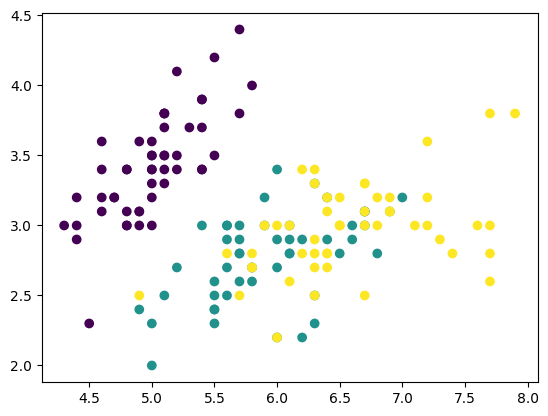

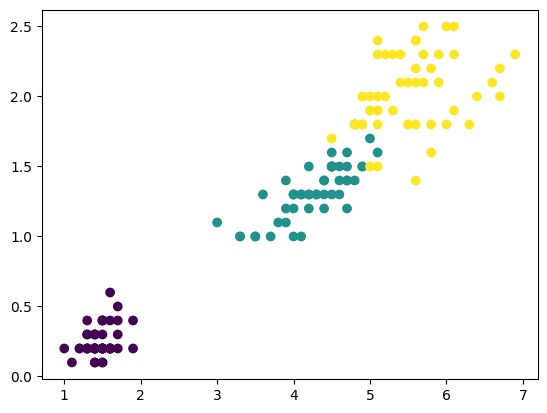

In [12]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the dataset from sklearn
x, y = load_iris( return_X_y=True )

# Visualize data
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

plt.scatter(x[:,2],x[:,3],c=y)
plt.show()


### Fit gaussian distributions

Estimate $\mu$ and $\sigma$ of each distribution.

In [13]:
import numpy as np

# Identify members of each class
cl1 = x[ y==0, :]
cl2 = x[ y==1, :]
cl3 = x[ y==2, :]

# Compute the mean (centroid) of each class
m1 = np.mean(cl1, axis=0)
m2 = np.mean(cl2, axis=0)
m3 = np.mean(cl2, axis=0)

# Compute the covariance matrix for each class
C1 = np.cov(cl1, rowvar=False)
C2 = np.cov(cl2, rowvar=False)
C3 = np.cov(cl3, rowvar=False)


### Make decisions

Assign each sample to the best class according to Bayes decition theory (i.e. the one that maximize the posterior probability).

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 2 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 1]
Classifier accuracy: 91.33%


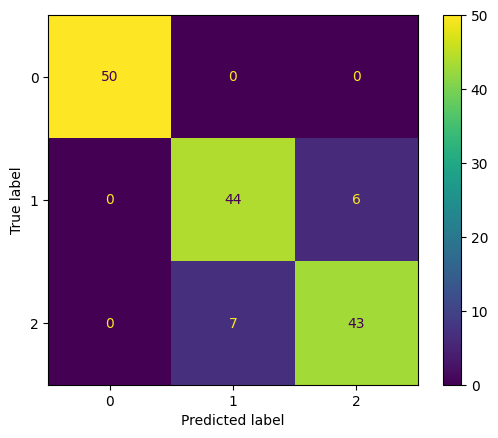

In [14]:
from scipy.stats import multivariate_normal

# compute the likelihood for each sample and each class
lik1 = multivariate_normal.pdf(x, m1 , C1)
lik2 = multivariate_normal.pdf(x, m2 , C2)
lik3 = multivariate_normal.pdf(x, m3 , C3)

# Compute the log of each likelihood and assign the best class
loglik = np.log(np.vstack((lik1,lik2,lik3)))
prediction =np.argmax(loglik, axis=0)
print (prediction)
# Compute accuracy of predictions
accuracy = np.sum(prediction==y) / len(y)
print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')

# Visualize confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,prediction)
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()

### Introduce a prior

Repeat the exercize introducing a non-uniform prior probability on the classes: $P(\omega_1) = P(\omega_2) = 0.1$ and $P(\omega_3) = 0.8$

Classifier accuracy: 66.00%


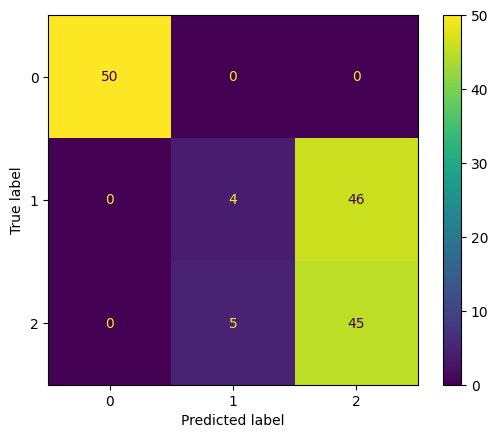

In [17]:
# Define the priors
Pw1 = 0.1
Pw2 = 0.2
Pw3 = 0.7

# Compute posterior probabilities
post1 = multivariate_normal.pdf(x,m1,C1) * Pw1
post2 = multivariate_normal.pdf(x,m2,C2) * Pw2
post3 = multivariate_normal.pdf(x,m3,C3) * Pw3

# Assign the best classes
logpost = np.log( np.vstack( (post1,post2,post3) ) )
prediction = np.argmax( logpost, axis=0)

# Compute accuracy of predictions
accuracy = np.sum( prediction == y) / len(y)
print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')

# Visualize confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,prediction)
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()


## With Scikit-Learn

We will now use the naive Bayes classifier embedded in scikit-learn package.

https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
gnb = GaussianNB()

# Fit the classifier parameters
gnb.fit(x,y)

# Predict the correct classes
y_pred = gnb.predict(x)

# Compute accuracy of predictions
accuracy =np.sum(prediction == y) / len(y)
print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')


Classifier accuracy: 66.00%
